In [1]:
import sys
import time
print(sys.executable)
from utils import *
import matplotlib.ticker as plticker
import seaborn as sns
import random
daily_ratings = loadDic()
movie_timeline = np.load(os.path.join('data', 'movie_timeline.npy'), allow_pickle=True).tolist()
time_dic = {
    2015:[(2014, 11), (2014, 12)] + ([(2015, m) for m in range(1, 11)]),
    2016:[(2015, 11), (2015, 12)] + ([(2016, m) for m in range(1, 11)]),
    2017:[(2016, 11), (2016, 12)] + ([(2017, m) for m in range(1, 11)]),
    2018:[(2017, 11), (2017, 12)] + ([(2018, m) for m in range(1, 11)]),
    2019:[(2018, 11), (2018, 12)] + ([(2019, m) for m in range(1, 11)])
}
threshold_list = [2, 4, 6, 8]
timeline_param_list = [4, 8, 16, 32, 64]

/Users/clivian/opt/anaconda3/bin/python


In [4]:
import sys
import time
print(sys.executable)
from utils import *
import matplotlib.ticker as plticker
import seaborn as sns
daily_ratings = loadDic()

/Users/clivian/opt/anaconda3/bin/python


In [3]:
# generate the movie timeline file
existing_movie = set()
start = time.time()
movie_timeline = {}
ini = datetime.date(2009, 11, 1)
end = datetime.date(2019, 10, 31)
for i in range(0, (end - ini).days + 1):
    cur = ini + datetime.timedelta(i)
    year, month, day = cur.year, cur.month, cur.day
    ratings = daily_ratings.get((year, month, day), -1)
    if ratings != -1: 
        day_movie = set()
        for movie in ratings:
            day_movie.add(movie)
            if movie not in existing_movie:
                diff = (datetime.date(year, month, day) - ini).days
                movie_timeline[movie] = [0] * diff + [len(ratings[movie])]
                existing_movie.add(movie)
            else:
                movie_timeline[movie].append(len(ratings[movie]))
        for movie in movie_timeline:
            if movie not in day_movie:
                movie_timeline[movie].append(0)
    else:
        for movie in movie_timeline:
            movie_timeline[movie].append(0)
                        
print(len(movie_timeline))
print(len(existing_movie))
# for movie in daily_ratings[(2019, 10, 31)]:
#     print(len(movie_timeline[movie]))
np.save(os.path.join('data', 'movie_timeline.npy'), movie_timeline)
end = time.time()
elapse = end - start
print(elapse)

58594
58594
65.55679416656494


In [18]:
# candidates and non-candidates timeline processing
start = time.time()
def range_lookup(num):
    if num >= 0 and num < 1:
        return 6
    elif num >= 1 and num < 2:
        return 5
    elif num >= 2 and num < 4:
        return 4
    elif num >= 4 and num < 8:
        return 3
    elif num >= 8 and num < 16:
        return 2
    elif num >= 16 and num < 32:
        return 1
    else:
        return 0

candidates = []
non_candidates = []
past_day_num = 64
for i in range(7):
    candidates.append([0] * past_day_num)
    non_candidates.append([0] * past_day_num)
fir = datetime.date(2009, 11, 1)
ini = datetime.date(2014, 11, 1)
gap = (ini - fir).days
end = datetime.date(2019, 10, 31)
for i in range(0, (end - ini).days + 1):
    cur = ini + datetime.timedelta(i)
    ratings = daily_ratings.get((cur.year, cur.month, cur.day), -1)
    if ratings != -1: 
        possible_candidates = set()
        actual_rated = set()
        for movie in ratings:
            actual_rated.add(movie)
        for j in range(past_day_num, 0, -1):
            pre = cur - datetime.timedelta(j)
            ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
            if ratings != -1:
                for movie in ratings:
                    possible_candidates.add(movie)
        for movie in possible_candidates:
            timeline = movie_timeline[movie][gap + i - past_day_num: gap + i]
            if movie in actual_rated:
                for k in range(0, past_day_num):
                    y_range = range_lookup(timeline[k])
                    candidates[y_range][k] += 1
            else:
                for k in range(0, past_day_num):
                    y_range = range_lookup(timeline[k])
                    non_candidates[y_range][k] += 1
    else:
        print('invalid', cur.year, cur.month, cur.day)
end = time.time()
elapse = end - start
print(elapse)

invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
569.755569934845


[[1360, 1349, 1350, 1355, 1356, 1339, 1340, 1351, 1342, 1349, 1345, 1331, 1348, 1339, 1350, 1353, 1351, 1363, 1357, 1357, 1350, 1344, 1392, 1415, 1418, 1417, 1406, 1401, 1405, 1412, 1411, 1403, 1415, 1412, 1404, 1409, 1407, 1414, 1432, 1431, 1412, 1409, 1408, 1403, 1429, 1423, 1422, 1417, 1414, 1418, 1430, 1439, 1426, 1430, 1422, 1417, 1419, 1424, 1435, 1434, 1439, 1441, 1441, 1446], [14596, 14606, 14565, 14622, 14613, 14524, 14584, 14579, 14575, 14610, 14572, 14557, 14517, 14553, 14590, 14561, 14612, 14595, 14559, 14573, 14585, 14498, 14748, 14836, 14846, 14804, 14782, 14751, 14803, 14856, 14858, 14814, 14825, 14862, 14820, 14852, 14801, 14865, 14905, 14886, 14882, 14853, 14854, 14882, 14899, 14879, 14883, 14848, 14897, 14873, 14918, 14935, 14938, 14872, 14857, 14894, 14842, 14914, 14967, 14934, 14925, 14950, 14961, 14990], [106510, 106709, 106541, 106533, 106469, 106355, 106558, 106718, 106917, 106878, 106729, 106565, 106634, 106705, 106923, 107036, 107052, 106846, 106729, 106734, 10

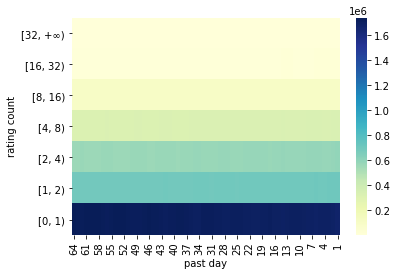

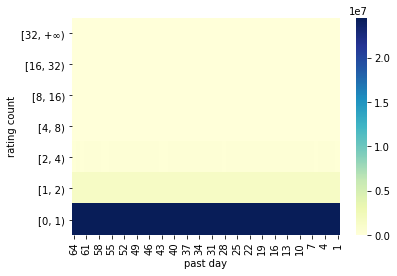

In [19]:
print(candidates)
print(non_candidates)
past_day_num = 64
fig, ax = plt.subplots()
ax = sns.heatmap(candidates, cmap="YlGnBu")
ax.set_xticklabels([str(i) for i in range(past_day_num, 0, -3)])
ax.set_yticklabels(['[32, +∞)', '[16, 32)', '[8, 16)', '[4, 8)', '[2, 4)', '[1, 2)', '[0, 1)'],
                   rotation='horizontal')
ax.set_xlabel('past day')
ax.set_ylabel('rating count')
fig.savefig('./figures/candidate_movie_time_series.png', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
ax = sns.heatmap(non_candidates, cmap="YlGnBu")
ax.set_xticklabels([str(i) for i in range(past_day_num, 0, -3)])
ax.set_yticklabels(['[32, +∞)', '[16, 32)', '[8, 16)', '[4, 8)', '[2, 4)', '[1, 2)', '[0, 1)'],
                   rotation='horizontal')
ax.set_xlabel('past day')
ax.set_ylabel('rating count')
fig.savefig('./figures/non_candidate_movie_time_series.png', bbox_inches='tight', dpi=300)

invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8


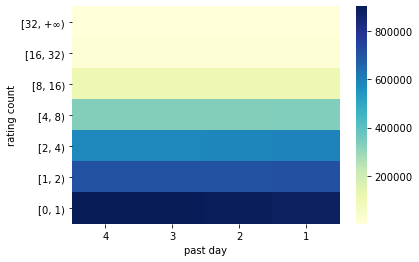

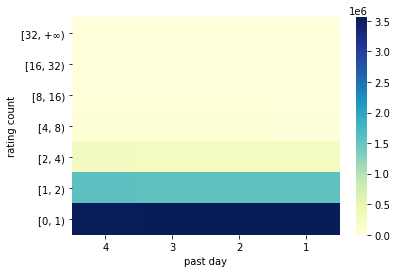

In [20]:
candidates = []
non_candidates = []
past_day_num = 4
for i in range(7):
    candidates.append([0] * past_day_num)
    non_candidates.append([0] * past_day_num)
fir = datetime.date(2009, 11, 1)
ini = datetime.date(2014, 11, 1)
gap = (ini - fir).days
end = datetime.date(2019, 10, 31)
for i in range(0, (end - ini).days + 1):
    cur = ini + datetime.timedelta(i)
    ratings = daily_ratings.get((cur.year, cur.month, cur.day), -1)
    if ratings != -1: 
        possible_candidates = set()
        actual_rated = set()
        for movie in ratings:
            actual_rated.add(movie)
        for j in range(past_day_num, 0, -1):
            pre = cur - datetime.timedelta(j)
            ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
            if ratings != -1:
                for movie in ratings:
                    possible_candidates.add(movie)
        for movie in possible_candidates:
            timeline = movie_timeline[movie][gap + i - past_day_num: gap + i]
            if movie in actual_rated:
                for k in range(0, past_day_num):
                    y_range = range_lookup(timeline[k])
                    candidates[y_range][k] += 1
            else:
                for k in range(0, past_day_num):
                    y_range = range_lookup(timeline[k])
                    non_candidates[y_range][k] += 1
    else:
        print('invalid', cur.year, cur.month, cur.day)
past_day_num = 4
fig, ax = plt.subplots()
ax = sns.heatmap(candidates, cmap="YlGnBu")
ax.set_xticklabels([str(i) for i in range(past_day_num, 0, -1)])
ax.set_yticklabels(['[32, +∞)', '[16, 32)', '[8, 16)', '[4, 8)', '[2, 4)', '[1, 2)', '[0, 1)'],
                   rotation='horizontal')
ax.set_xlabel('past day')
ax.set_ylabel('rating count')
fig.savefig('./figures/candidate_movie_time_series4.png', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
ax = sns.heatmap(non_candidates, cmap="YlGnBu")
ax.set_xticklabels([str(i) for i in range(past_day_num, 0, -1)])
ax.set_yticklabels(['[32, +∞)', '[16, 32)', '[8, 16)', '[4, 8)', '[2, 4)', '[1, 2)', '[0, 1)'],
                   rotation='horizontal')
ax.set_xlabel('past day')
ax.set_ylabel('rating count')
fig.savefig('./figures/non_candidate_movie_time_series4.png', bbox_inches='tight', dpi=300)

In [ ]:
# plot rating per movie per day and rating per user per day
R_list = []
ini = datetime.date(2009, 11, 1)
end = datetime.date(2019, 10, 31)
for i in range(0, (end - ini).days + 1):
    cur = ini + datetime.timedelta(i)
    date = (cur.year, cur.month, cur.day)
    ratings = daily_ratings.get(date, -1)
    if ratings != -1:
        user_activities = getUserActivities(ratings)
        for user in user_activities:
            movies = user_activities[user]
            R_list.append(len(movies))
fig, ax = plt.subplots()
ax.hist(R_list, bins=np.logspace(np.log10(1),np.log10(5000), 20))
print(len(R_list))
plt.xscale('log')
ax.set_xlabel('number of ratings provided by user in one day')
ax.set_ylabel('occurrence' )
fig.savefig('./figures/R_pattern', bbox_inches='tight', dpi=300)

rating_permovie_perday = []
for movie in movie_timeline:
    for num in movie_timeline[movie]:
        if num != 0:
            rating_permovie_perday.append(num)
fig, ax = plt.subplots()
ax.hist(rating_permovie_perday, bins=np.logspace(np.log10(1),np.log10(200), 10))
plt.xscale('log')
ax.set_xlabel('number of ratings received by movie in one day')
ax.set_ylabel('occurrence' )
fig.savefig('./figures/movie_received_pattern', bbox_inches='tight', dpi=300)

# plot the 5 year timeline of top 20 movies
# temp_x = [i for i in range(len(movie_timeline[2571]) // 2)]
# temp_mkeys = mostPop(daily_ratings, 20, (2019, 1, 1))
# x_loc = plticker.MultipleLocator(base=(len(movie_timeline[2571]) // 2 // 10))
# # y_loc = plticker.MultipleLocator(base=10)
# for movie in random.sample(temp_mkeys, 20):
#     fig, ax = plt.subplots()
#     ax.xaxis.set_major_locator(x_loc)
# #     ax.yaxis.set_major_locator(y_loc)
#     ax.plot(temp_x, movie_timeline[movie][len(movie_timeline[2571])
#                                          - len(movie_timeline[2571]) // 2:], linewidth=0.3)
#     ax.set_xticklabels([''] + [(len(movie_timeline[2571]) // 2 - 
#                                 len(movie_timeline[2571]) // 2 //
#                                 10 * i) for i in range(10)])


In [2]:
# when use threshold, plot ideal r-precision without smoothing
fir = datetime.date(2009, 11, 1)
ini = datetime.date(2014, 11, 1)
gap = (ini - fir).days
end = datetime.date(2019, 10, 31)
all_pre_selection_ideal_r_precision = []
for threshold in [0, 2, 4, 6, 8, 10]:
    pre_selection_ideal_r_precision_per_threshold = []
    for past_day_num in [4, 8, 16, 32, 64]:
        pre_selection_ideal_r_precision = {}
        for i in range(0, (end - ini).days + 1):
            cur = ini + datetime.timedelta(i)
            cur_ratings = daily_ratings.get((cur.year, cur.month, cur.day), -1)
            if cur_ratings != -1:
                movie_after_selection = []
                possible_candidates = set()
                for j in range(past_day_num, 0, -1):
                    pre = cur - datetime.timedelta(j)
                    ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
                    if ratings != -1:
                        for movie in ratings:
                            possible_candidates.add(movie)
                for movie in possible_candidates:
                    timeline = movie_timeline[movie][i + gap - past_day_num: i + gap]
                    if max(timeline) >= threshold:
                        movie_after_selection.append(movie)
                user_activities = getUserActivities(cur_ratings)
                cur_r_precision = 0
                for user in user_activities:                                
                    actual = user_activities[user]
                    r = 0
                    R = len(actual)
                    for movie in actual:
                        if movie in movie_after_selection:
                            r += 1
                    cur_r_precision += (r / R)
                cur_r_precision /= len(user_activities)
                pre_selection_ideal_r_precision[(cur.year, cur.month, cur.day)] = cur_r_precision
            else:
                print('invalid', cur.year, cur.month, cur.day)
        pre_selection_ideal_r_precision_per_threshold.append(pre_selection_ideal_r_precision)
        print(len(pre_selection_ideal_r_precision_per_threshold), 
              len(pre_selection_ideal_r_precision_per_threshold[0]))
    all_pre_selection_ideal_r_precision.append(pre_selection_ideal_r_precision_per_threshold)
print(len(all_pre_selection_ideal_r_precision), len(all_pre_selection_ideal_r_precision[0]))

invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
1 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
2 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
3 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
4 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
5 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
1 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
2 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
3 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
4 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
5 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
1 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
2 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
3 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
4 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
5 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
1 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
2 18

<ipython-input-3-7555024c8d0d>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(year_x)


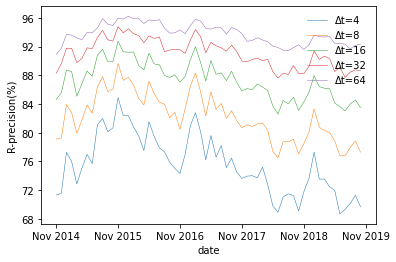

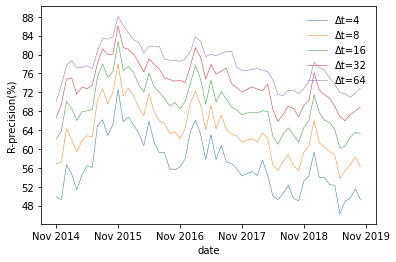

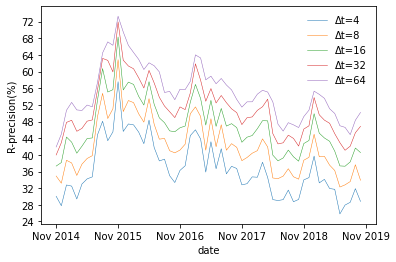

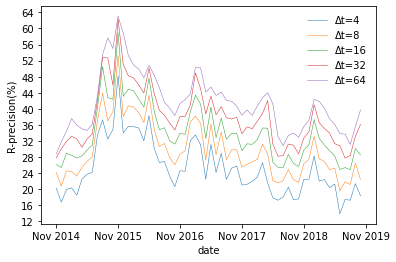

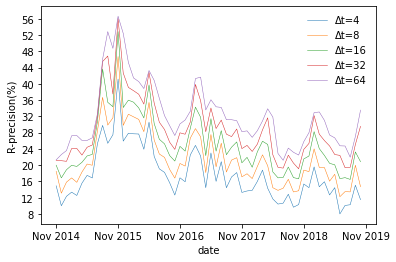

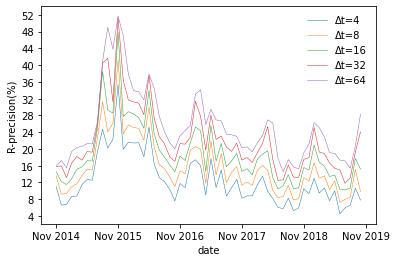

In [3]:
# access the effect of thresholds
all_threshold_monthly_ave = []
for t in range(len([0, 2, 4, 6, 8, 10])):
    threshold_monthly_ave = []
    for i in range(5):
        threshold_monthly_ave_per_param = []
        for _year in range(2015, 2020):
                for year, month in time_dic[_year]:
                    monthly_ave = []
                    for day in range(1, 32):
                        date = (year, month, day)
                        precision = all_pre_selection_ideal_r_precision[t][i].get(date, -1)
                        if precision != -1:
                            monthly_ave.append(precision)
                    threshold_monthly_ave_per_param.append(sum(monthly_ave) / len(monthly_ave) * 100)
        threshold_monthly_ave.append(threshold_monthly_ave_per_param)
    all_threshold_monthly_ave.append(threshold_monthly_ave)

year_x = ['']
temp_x = [i for i in range(0, 60)]
for year in range(2014, 2020):
    year_x.append('Nov ' + str(year))
for i in range(len([0, 2, 4, 6, 8, 10])):
    fig, ax = plt.subplots()
    x_loc = plticker.MultipleLocator(base=12)
    y_loc = plticker.MultipleLocator(base=4)
    ax.xaxis.set_major_locator(x_loc)
    ax.yaxis.set_major_locator(y_loc)
    for j in range(0, len(timeline_param_list)):
        param = timeline_param_list[j]
        ax.plot(temp_x, all_threshold_monthly_ave[i][j],
                linewidth=0.5, label= 'Δt=' + str(param))
    ax.legend(loc='upper right', frameon=False)
    ax.set_xticklabels(year_x)
    ax.set_xlabel('date')
    ax.set_ylabel('R-precision(%)' )
    fig.savefig('./figures/monthly_average_threshold_' + str([0, 2, 4, 6, 8, 10][i])
                , bbox_inches='tight', dpi=300)
                        

In [4]:
# when use threshold, plot ideal r-precision with smoothing by taking weekly average
fir = datetime.date(2009, 11, 1)
ini = datetime.date(2014, 11, 1)
gap = (ini - fir).days
end = datetime.date(2019, 10, 31)
all_pre_selection_ideal_r_precision = []
for threshold in [0, 1, 2, 4, 6, 8, 10]:
    pre_selection_ideal_r_precision_per_threshold = []
    for past_day_num in [4, 8, 16, 32, 64]:
        pre_selection_ideal_r_precision = {}
        for i in range(0, (end - ini).days + 1):
            cur = ini + datetime.timedelta(i)
            cur_ratings = daily_ratings.get((cur.year, cur.month, cur.day), -1)
            if cur_ratings != -1:
                movie_after_selection = []
                possible_candidates = set()
                for j in range(past_day_num * 7, 0, -1):
                    pre = cur - datetime.timedelta(j)
                    ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
                    if ratings != -1:
                        for movie in ratings:
                            possible_candidates.add(movie)
                for movie in possible_candidates:
                    timeline = movie_timeline[movie][i + gap - past_day_num * 7: i + gap]
                    timeline = [sum(timeline[i*7:i*7+7]) / 7 for i in range(0, past_day_num)]
                    if max(timeline) >= threshold:
                        movie_after_selection.append(movie)
                user_activities = getUserActivities(cur_ratings)
                cur_r_precision = 0
                for user in user_activities:                                
                    actual = user_activities[user]
                    r = 0
                    R = len(actual)
                    for movie in actual:
                        if movie in movie_after_selection:
                            r += 1
                    cur_r_precision += (r / R)
                cur_r_precision /= len(user_activities)
                pre_selection_ideal_r_precision[(cur.year, cur.month, cur.day)] = cur_r_precision
            else:
                print('invalid', cur.year, cur.month, cur.day)
        pre_selection_ideal_r_precision_per_threshold.append(pre_selection_ideal_r_precision)
        print(len(pre_selection_ideal_r_precision_per_threshold), 
              len(pre_selection_ideal_r_precision_per_threshold[0]))
    all_pre_selection_ideal_r_precision.append(pre_selection_ideal_r_precision_per_threshold)
print(len(all_pre_selection_ideal_r_precision), len(all_pre_selection_ideal_r_precision[0]))


invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
1 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
2 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
3 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
4 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
5 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
1 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
2 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
3 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
4 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
5 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
1 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
2 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
3 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
4 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
5 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
1 1823
invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
2 18

7 0 0
7 0 1
7 0 2
7 0 3
7 0 4


<ipython-input-5-b734c32aadcc>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(year_x)


7 1 0
7 1 1
7 1 2
7 1 3
7 1 4
7 2 0
7 2 1
7 2 2
7 2 3
7 2 4
7 3 0
7 3 1
7 3 2
7 3 3
7 3 4
7 4 0
7 4 1
7 4 2
7 4 3
7 4 4
7 5 0
7 5 1
7 5 2
7 5 3
7 5 4
7 6 0
7 6 1
7 6 2
7 6 3
7 6 4


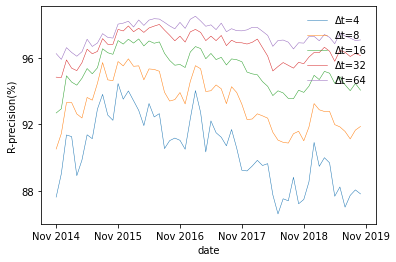

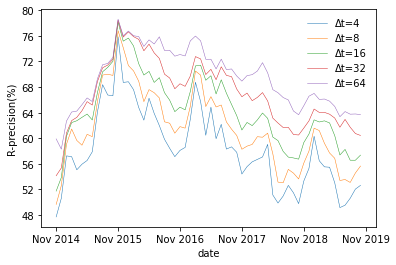

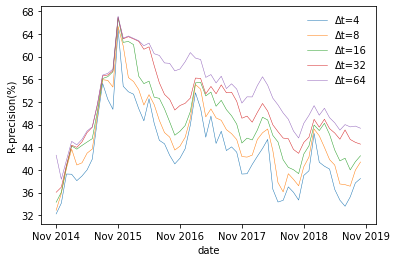

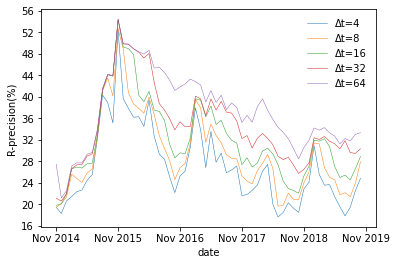

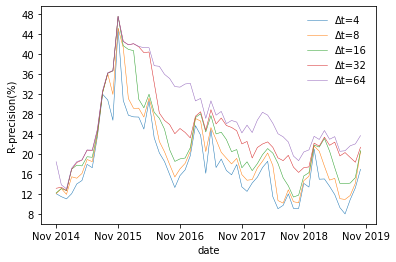

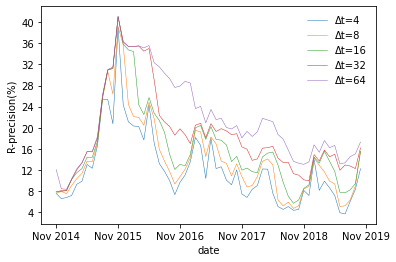

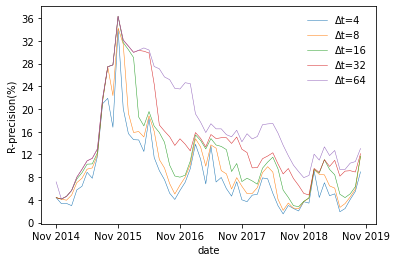

In [5]:
# access the effect of thresholds
all_threshold_monthly_ave = []
for t in range(len([0, 1, 2, 4, 6, 8, 10])):
    threshold_monthly_ave = []
    for i in range(5):
        threshold_monthly_ave_per_param = []
        for _year in range(2015, 2020):
                for year, month in time_dic[_year]:
                    monthly_ave = []
                    for day in range(1, 32):
                        date = (year, month, day)
                        precision = all_pre_selection_ideal_r_precision[t][i].get(date, -1)
                        if precision != -1:
                            monthly_ave.append(precision)
                    threshold_monthly_ave_per_param.append(sum(monthly_ave) / len(monthly_ave) * 100)
        threshold_monthly_ave.append(threshold_monthly_ave_per_param)
    all_threshold_monthly_ave.append(threshold_monthly_ave)
year_x = ['']
temp_x = [i for i in range(0, 60)]
for year in range(2014, 2020):
    year_x.append('Nov ' + str(year))
for i in range(len([0, 1, 2, 4, 6, 8, 10])):
    fig, ax = plt.subplots()
    x_loc = plticker.MultipleLocator(base=12)
    y_loc = plticker.MultipleLocator(base=4)
    ax.xaxis.set_major_locator(x_loc)
    ax.yaxis.set_major_locator(y_loc)
    for j in range(0, 5):
        param = timeline_param_list[j]
        print(len(all_threshold_monthly_ave), i , j)
        ax.plot(temp_x, all_threshold_monthly_ave[i][j], linewidth=0.5,
                label='Δt=' + str(param))
    ax.legend(loc='upper right', frameon=False)
    ax.set_xticklabels(year_x)
    ax.set_xlabel('date')
    ax.set_ylabel('R-precision(%)')
    fig.savefig('./figures/monthly_average_smoothed_threshold_' + str([0, 1, 2, 4, 6, 8, 10][i])
            , bbox_inches='tight', dpi=300)

                        

In [2]:
# run algo for timeline data without smoothing
start = time.time()
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, HuberRegressor
from sklearn.svm import SVR
ini = datetime.date(2009, 11, 1)
day_aves = []
for threshold_num in threshold_list:
    day_aves_per_thre = []
    for past_day_num in timeline_param_list:
        print(threshold_num, past_day_num)
        day_ave = {}
        for _year in range(2015, 2020):
            for year, month in time_dic[_year]:
                for day in range(1, 32):
                    date = (year, month, day)
                    ratings = daily_ratings.get(date, -1) 
                    if ratings == -1:
                        print('date', date, 'invalid')
                        continue
                    cur = datetime.date(year, month, day)
                    user_activities = getUserActivities(daily_ratings[date])
                    max_R = getMaxR(user_activities)

                    # pre selection
                    possible_candidates = set()
                    LR_possible_candidates = {}
                    SVR_linear_possible_candidates = {}
                    SVR_rbf_possible_candidates = {}
#                     SGD_possible_candidates = {}
                    Ridge_possible_candidates = {}
                    Huber_possible_candidates = {}


                    for j in range(past_day_num, 0, -1):
                        pre = cur - datetime.timedelta(j)
                        ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
                        if ratings != -1:
                            for movie in ratings:
                                if movie in possible_candidates:
                                    continue
                                possible_candidates.add(movie)
                                i = (cur - ini).days
                                timeline = movie_timeline[movie][i - past_day_num: i]
                                if max(timeline) >= threshold_num:
                                    train_x = [[num] for num in range(1, past_day_num + 1)]
                                    train_y = timeline

                                    LR_model = LinearRegression().fit(train_x, train_y)             
                                    LR_pop = float(LR_model.predict([[past_day_num + 1]])[0])
                                    LR_possible_candidates[movie] = LR_pop

                                    SVR_linear_model = SVR(kernel='linear', epsilon=1).fit(train_x, train_y)
                                    SVR_linear_pop = float(SVR_linear_model.predict([[past_day_num + 1]])[0])
                                    SVR_linear_possible_candidates[movie] = SVR_linear_pop

                                    SVR_rbf_model = SVR(kernel='rbf', epsilon=1).fit(train_x, train_y)
                                    SVR_rbf_pop = float(SVR_rbf_model.predict([[past_day_num + 1]])[0])
                                    SVR_rbf_possible_candidates[movie] = SVR_rbf_pop
                                    
#                                     SGD_model = SGDRegressor(tol=1).fit(train_x, train_y)
#                                     SGD_pop = float(SGD_model.predict([[past_day_num + 1]])[0])
#                                     SGD_possible_candidates[movie] = SGD_pop
                                    
                                    Ridge_model = Ridge().fit(train_x, train_y)
                                    Ridge_pop = float(Ridge_model.predict([[past_day_num + 1]])[0])
                                    Ridge_possible_candidates[movie] = Ridge_pop
                                    
                                    try:
                                        Huber_model = HuberRegressor().fit(train_x, train_y)
                                        Huber_pop = float(Huber_model.predict([[past_day_num + 1]])[0])
                                        Huber_possible_candidates[movie] = Huber_pop
                                    except:
                                        Huber_pop = float(movie_timeline[movie][i - 1])
                                        Huber_possible_candidates[movie] = Huber_pop

                    maxR_LR_pop = getTopN(LR_possible_candidates, max_R)
                    maxR_SVR_linear_pop = getTopN(SVR_linear_possible_candidates, max_R)
                    maxR_SVR_rbf_pop = getTopN(SVR_rbf_possible_candidates, max_R)
#                     maxR_SGD_pop = getTopN(SGD_possible_candidates, max_R)
                    maxR_Ridge_pop = getTopN(Ridge_possible_candidates, max_R)
                    maxR_Huber_pop = getTopN(Huber_possible_candidates, max_R)

                    LR_R_precision = RPrecision(user_activities, maxR_LR_pop)
                    SVR_linear_R_precision = RPrecision(user_activities, maxR_SVR_linear_pop)
                    SVR_rbf_R_precision = RPrecision(user_activities, maxR_SVR_rbf_pop)
#                     SGD_precision = RPrecision(user_activities, maxR_SGD_pop)
                    Ridge_precision = RPrecision(user_activities, maxR_Ridge_pop) 
                    huber_precision = RPrecision(user_activities, maxR_Huber_pop)

                    day_ave[date] = (LR_R_precision, 
                                     SVR_linear_R_precision, 
                                     SVR_rbf_R_precision,
#                                      SGD_precision, 
                                     Ridge_precision,
                                     huber_precision)
                    
        day_aves_per_thre.append(day_ave)
    day_aves.append(day_aves_per_thre)
np.save(os.path.join('data', 'day_ave_timeline_algo.npy'), day_aves)
end = time.time()
elapse = end - start
print(elapse)

2 4
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
2 8
date (2014, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 4, 31) invalid
date (2015, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
2 16


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2014, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 2, 30) invalid
date (2016, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


2 32


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2014, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 2, 30) invalid
date (2016, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

2 64


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2014, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 2, 30) invalid
date (2016, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

4 4
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
4 8
date (2014, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 6, 31) invalid
date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
4 16


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 6, 31) invalid
date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 2, 30) invalid
date (2016, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
4 32


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 4, 31) invalid
date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
4 64


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2014, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid
date (2017, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid
date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 9, 31) invalid
6 4
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
6 8
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) in

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
6 16
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
6 32


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invali

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
8 4
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
8 8
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) in

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
215314.82820510864


In [21]:
# run algo for timeline data, with smoothing by taking weekly average
start = time.time()
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, HuberRegressor
from sklearn.svm import SVR
ini = datetime.date(2009, 11, 1)
day_aves = []
for threshold_num in [1, 2, 4, 6]:
    day_aves_per_thre = []
    for past_day_num in timeline_param_list:
        print(threshold_num, past_day_num)
        day_ave = {}
        for _year in range(2015, 2020):
            for year, month in time_dic[_year]:
                for day in range(1, 32):
                    date = (year, month, day)
                    ratings = daily_ratings.get(date, -1) 
                    if ratings == -1:
                        print('date', date, 'invalid')
                        continue
                    cur = datetime.date(year, month, day)
                    user_activities = getUserActivities(daily_ratings[date])
                    max_R = getMaxR(user_activities)

                    # pre selection
                    possible_candidates = set()
                    LR_possible_candidates = {}
                    SVR_linear_possible_candidates = {}
                    SVR_rbf_possible_candidates = {}
#                     SGD_possible_candidates = {}
                    Ridge_possible_candidates = {}
                    Huber_possible_candidates = {}


                    for j in range(past_day_num, 0, -1):
                        pre = cur - datetime.timedelta(j)
                        ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
                        if ratings != -1:
                            for movie in ratings:
                                if movie in possible_candidates:
                                    continue
                                possible_candidates.add(movie)
                                i = (cur - ini).days
                                timeline = movie_timeline[movie][i - past_day_num * 7: i]
                                timeline = [sum(timeline[i*7:i*7+7]) / 7 for i in range(0, past_day_num)]
                                if max(timeline) >= threshold_num:
                                    train_x = [[num] for num in range(1, past_day_num + 1)]
                                    train_y = timeline

                                    LR_model = LinearRegression().fit(train_x, train_y)             
                                    LR_pop = float(LR_model.predict([[past_day_num + 1]])[0])
                                    LR_possible_candidates[movie] = LR_pop

                                    SVR_linear_model = SVR(kernel='linear', epsilon=1).fit(train_x, train_y)
                                    SVR_linear_pop = float(SVR_linear_model.predict([[past_day_num + 1]])[0])
                                    SVR_linear_possible_candidates[movie] = SVR_linear_pop

                                    SVR_rbf_model = SVR(kernel='rbf', epsilon=1).fit(train_x, train_y)
                                    SVR_rbf_pop = float(SVR_rbf_model.predict([[past_day_num + 1]])[0])
                                    SVR_rbf_possible_candidates[movie] = SVR_rbf_pop
                                    
# #                                     SGD_model = SGDRegressor(tol=1).fit(train_x, train_y)
# #                                     SGD_pop = float(SGD_model.predict([[past_day_num + 1]])[0])
# #                                     SGD_possible_candidates[movie] = SGD_pop
                                    
                                    Ridge_model = Ridge().fit(train_x, train_y)
                                    Ridge_pop = float(Ridge_model.predict([[past_day_num + 1]])[0])
                                    Ridge_possible_candidates[movie] = Ridge_pop
                                    
                                    try:
                                        Huber_model = HuberRegressor().fit(train_x, train_y)
                                        Huber_pop = float(Huber_model.predict([[past_day_num + 1]])[0])
                                        Huber_possible_candidates[movie] = Huber_pop
                                    except:
                                        Huber_pop = float(movie_timeline[movie][i - 1])
                                        Huber_possible_candidates[movie] = Huber_pop

                    maxR_LR_pop = getTopN(LR_possible_candidates, max_R)
                    maxR_SVR_linear_pop = getTopN(SVR_linear_possible_candidates, max_R)
                    maxR_SVR_rbf_pop = getTopN(SVR_rbf_possible_candidates, max_R)
#                     maxR_SGD_pop = getTopN(SGD_possible_candidates, max_R)
                    maxR_Ridge_pop = getTopN(Ridge_possible_candidates, max_R)
                    maxR_Huber_pop = getTopN(Huber_possible_candidates, max_R)

                    LR_R_precision = RPrecision(user_activities, maxR_LR_pop)
                    SVR_linear_R_precision = RPrecision(user_activities, maxR_SVR_linear_pop)
                    SVR_rbf_R_precision = RPrecision(user_activities, maxR_SVR_rbf_pop)
#                     SGD_precision = RPrecision(user_activities, maxR_SGD_pop)
                    Ridge_precision = RPrecision(user_activities, maxR_Ridge_pop) 
                    huber_precision = RPrecision(user_activities, maxR_Huber_pop)

                    day_ave[date] = (LR_R_precision, 
                                     SVR_linear_R_precision, 
                                     SVR_rbf_R_precision,
# #                                      SGD_precision, 
                                     Ridge_precision,
                                     huber_precision
                                    )
                    
        day_aves_per_thre.append(day_ave)
    day_aves.append(day_aves_per_thre)
np.save(os.path.join('data', 'day_ave_smoothed_timeline_algo.npy'), day_aves)
end = time.time()
elapse = end - start
print(elapse)

1 4
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 9, 31) invalid
1 8
date (2014, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid
date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
1 16
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
1 32
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 4, 31) invalid
date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 4, 31) invalid
date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
1 64


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2014, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2015, 9, 31) invalid
date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 2, 30) invalid
date (2016, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2016, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 4, 31) invalid
date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

date (2019, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

2 4
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 9, 31) invalid
2 8
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
2 16
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) i

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
2 64


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 4, 31) invalid
date (2016, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 11, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 9, 31) invalid
4 4
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
4 8
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) in

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
6 4
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid


/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
6 8
date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) in

/Users/clivian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invalid
137822.8684179783


In [63]:
day_aves = np.load(os.path.join('data', 'day_aves.npy'), allow_pickle=True).tolist()
timeline_aves = np.load(os.path.join('data', 'day_ave_timeline_algo.npy'), allow_pickle=True).tolist()

timeline_year_aves = []
timeline_month_aves = []
timeline_methods = ['linear regression', 'SVR with linear kernel', 
           'SVR with polynomial kernel', 'SVR with RBF kernel']
for method in range(len(timeline_methods)):
    timeline_year_aves_per_method = []
    timeline_month_aves_per_method = []
    for timeline_ave in timeline_aves:
        year_ave_per_param = []
        month_ave_per_param = []
        for _year in range(2015, 2020):
            year_value = []
            for year, month in time_dic[_year]:
                month_value = []
                for day in range(1, 32):
                    value = timeline_ave.get((year, month, day), -1)
                    if value != -1:
                        year_value.append(value[method])
                        month_value.append(value[method])
                month_ave_per_param.append(sum(month_value) / len(month_value) * 100)
            year_ave_per_param.append("%.3f" % (sum(year_value) / len(year_value) * 100))
        timeline_year_aves_per_method.append(year_ave_per_param)
        timeline_month_aves_per_method.append(month_ave_per_param)
    timeline_year_aves.append(timeline_year_aves_per_method)
    timeline_month_aves.append(timeline_month_aves_per_method)

# compare all methods with optimal param  
month_aves = []
year_aves = []
yearly_pattern = []
monthly_pattern = []
weekday_pattern = []
for method in range(0, 4):
    year_ave_per_method = []
    month_ave_per_method = []
    weekday_pattern_per_method = [[] for i in range(7)]
    monthly_pattern_per_method = [[] for i in range(12)]
    yearly_pattern_per_method = [[] for i in range(5)]
    for day_ave in day_aves:
        for _year in range(2015, 2020):
            year_value = []
            for year, month in time_dic[_year]:
                month_value = []
                for day in range(1, 32):
                    value = day_ave.get((year, month, day), -1)
                    if method == 3: #timeline
                        value = timeline_aves[2].get((year, month, day), -1)
                    if value != -1:
                        weekday = datetime.date(year, month, day).weekday()
                        if day_ave == day_aves[2] and (method == 1 or method == 0): # deltat = 4
                            month_value.append(value[method])
                            year_value.append(value[method])
                            weekday_pattern_per_method[weekday].append(value[method])
                            monthly_pattern_per_method[month - 1].append(value[method])
                            yearly_pattern_per_method[_year - 2015].append(value[method])
                        if day_ave == day_aves[3] and method == 2: # deltat = 8
                            month_value.append(value[method])
                            year_value.append(value[method])
                            weekday_pattern_per_method[weekday].append(value[method])
                            monthly_pattern_per_method[month - 1].append(value[method])
                            yearly_pattern_per_method[_year - 2015].append(value[method])
                        if method == 3: #timeline
                            month_value.append(value[0])
                            year_value.append(value[0])
                            weekday_pattern_per_method[weekday].append(value[0])
                            monthly_pattern_per_method[month - 1].append(value[0])
                            yearly_pattern_per_method[_year - 2015].append(value[0])
                if month_value != []:
                    month_ave_per_method.append(sum(month_value) / len(month_value) * 100)
            if year_value != []:
                year_ave_per_method.append("%.3f" % (sum(year_value) / len(year_value) * 100))
        if method == 3:
            break
    year_aves.append(year_ave_per_method)
    month_aves.append(month_ave_per_method)
    weekday_pattern.append([(sum(v) / len(v) * 100) for v in weekday_pattern_per_method])
    monthly_pattern.append([(sum(v) / len(v) * 100) for v in monthly_pattern_per_method])
    yearly_pattern.append([(sum(v) / len(v) * 100) for v in yearly_pattern_per_method])
methods = ['mostPop', 'recentPop', 'decayPop']
colors = ['r', 'b', 'g', 'k']
# print(year_aves)
# print(month_aves)

<ipython-input-64-f58fada252ef>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(year_x)


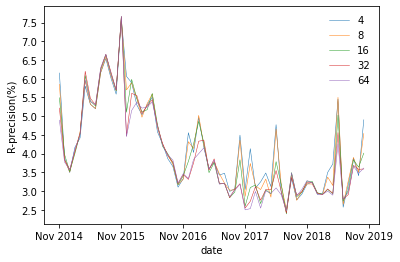

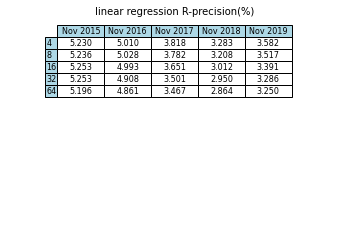

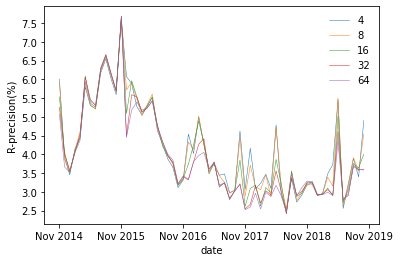

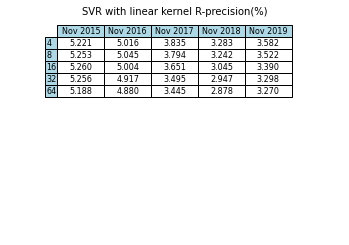

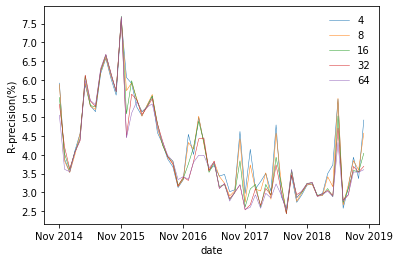

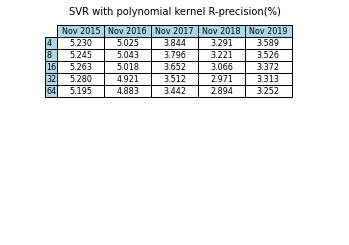

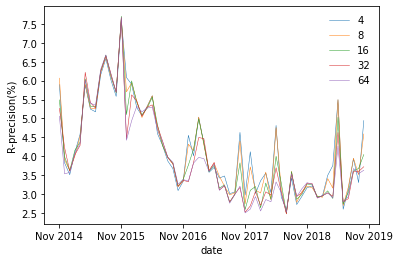

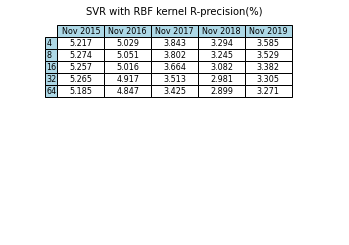

In [64]:
for method in range(len(timeline_methods)):
    year_x = ['']
    temp_x = [i for i in range(0, 60)]
    for year in range(2014, 2020):
        year_x.append('Nov ' + str(year))
    fig, ax = plt.subplots()
    x_loc = plticker.MultipleLocator(base=12)
    y_loc = plticker.MultipleLocator(base=0.5)
    ax.xaxis.set_major_locator(x_loc)
    ax.yaxis.set_major_locator(y_loc)
    for j in range(0, len(timeline_param_list)):
        param = timeline_param_list[j]
        ax.plot(temp_x, timeline_month_aves[method][j], linewidth=0.5, label=str(param))
    ax.legend(loc='upper right', frameon=False)
    ax.set_xticklabels(year_x)
    ax.set_xlabel('date')
    ax.set_ylabel('R-precision(%)' )
    fig.savefig('./figures/monthly_average_' + 
                str(timeline_methods[method]), bbox_inches='tight', dpi=300)

    fig, ax = plt.subplots() 
    ax.set_axis_off() 
    ax.set_title(str(timeline_methods[method]) + ' R-precision(%)'
        , loc='center', fontsize=10)
    table = ax.table(
        cellText = timeline_year_aves[method],
        rowLabels = timeline_param_list,
        colLabels = ['Nov ' + str(year) for year in range(2015, 2021)],
        rowColours = ["lightblue"] * len(timeline_year_aves[method]),  
        colColours = ["lightblue"] * len(timeline_year_aves[method][0]), 
        colWidths= [0.14] * len(timeline_year_aves[method][0]),
        cellLoc ='center',
        loc ='upper center',
    )
    bbox = table.get_window_extent(fig.canvas.get_renderer())
    bbox = bbox.from_extents(bbox.xmin-5, bbox.ymin-5, bbox.xmax+5, bbox.ymax+25)
    bbox_inches = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('./figures/yearly_average_' +
                str(timeline_methods[method]), bbox_inches=bbox_inches, dpi=300)

<ipython-input-57-4416e15de6da>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(year_x)


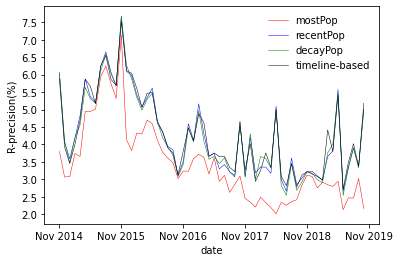

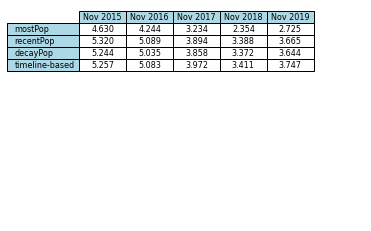

In [57]:
# plot monthly average of all methods with optimal param
methods = ['mostPop', 'recentPop', 'decayPop', 'time-series-based']
year_x = ['']
for year in range(2014, 2020):
    year_x.append('Nov ' + str(year))
year_x[0] = 'Nov 2014'
temp_x = [i for i in range(0, 60)]
fig, ax = plt.subplots()
x_loc = plticker.MultipleLocator(base=12)
y_loc = plticker.MultipleLocator(base=0.5)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
for i in range(0, len(methods)):
    ax.plot(temp_x, month_aves[i], color=colors[i], linewidth=0.5, label=str(methods[i]))
    ax.legend(loc='upper right', frameon=False)
    ax.set_xticklabels(year_x)
    ax.set_xlabel('date')
    ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/monthly_average_4_methods', bbox_inches='tight', dpi=300)

# plot yearly average
fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table(
    cellText = year_aves,
    rowLabels = ['mostPop', 'recentPop', 'decayPop', 'time-series-based'],
    colLabels = ['Nov ' + str(year) for year in range(2015, 2021)],
    rowColours = ["lightblue"] * len(year_aves),  
    colColours = ["lightblue"] * len(year_aves[0]), 
    colWidths= [0.14] * len(year_aves[0]),
    cellLoc ='center',
    loc ='upper center',
)
bbox = table.get_window_extent(fig.canvas.get_renderer())
bbox = bbox.from_extents(bbox.xmin-5, bbox.ymin-5, bbox.xmax+5, bbox.ymax+25)
bbox_inches = bbox.transformed(fig.dpi_scale_trans.inverted())
fig.savefig('./figures/yearly_average_4_methods', bbox_inches=bbox_inches, dpi=300)


<ipython-input-58-7e0ec1a1a926>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
<ipython-input-58-7e0ec1a1a926>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.',
<ipython-input-58-7e0ec1a1a926>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])


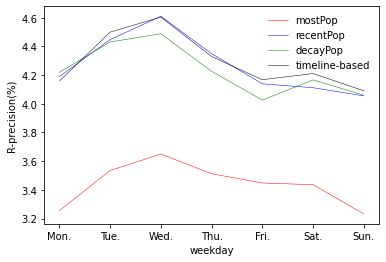

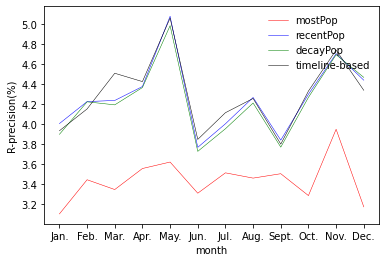

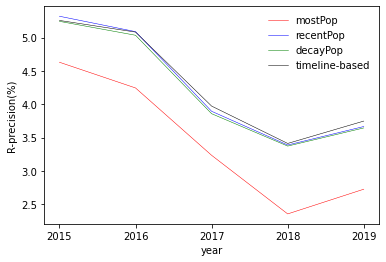

In [58]:
# weekday_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(7)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.2)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('weekday pattern', loc='center')
for i in range(4):
    ax.plot(temp_x,
            weekday_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('weekday')
ax.set_ylabel('R-precision(%)')
fig.savefig('./figures/weekday_pattern_4_methods', bbox_inches='tight', dpi=300)

# monthly_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(12)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.2)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('monthly pattern', loc='center')
for i in range(4):
    ax.plot(temp_x,
            monthly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 
                    'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('month')
ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/monthly_pattern_4_methods', bbox_inches='tight', dpi=300)

# yearly_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(5)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.5)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('yearly pattern', loc='center')
for i in range(4):
    ax.plot(temp_x,
            yearly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('year')
ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/yearly_pattern_4_methods', bbox_inches='tight', dpi=300)

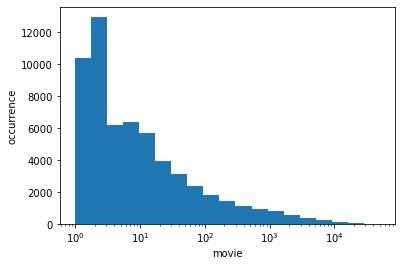

In [6]:
movies_pop = []
for movie in movie_timeline:
    movies_pop.append(sum(movie_timeline[movie]))
fig, ax = plt.subplots()
ax.hist(movies_pop, bins=np.logspace(np.log10(1),np.log10(50000), 20))
plt.xscale('log')
ax.set_xlabel('movie')
ax.set_ylabel('occurrence' )
fig.savefig('./figures/movie_pop_hist', bbox_inches='tight', dpi=300)